In [41]:
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
# read in csv at "../../Data/benchmark.csv"
df = pd.read_csv("../../Data/benchmark.csv")
# print the dataframe
print(df)

                  Model  Score
0         Llama 3.3 70B  0.713
1  Qwen2.5 Instruct 32B  0.697
2         Llama 3.1 70B  0.676
3           Gemma 3 27B  0.669
4         Mixtral 8x22B  0.537
5   Mistral 7B Instruct  0.245


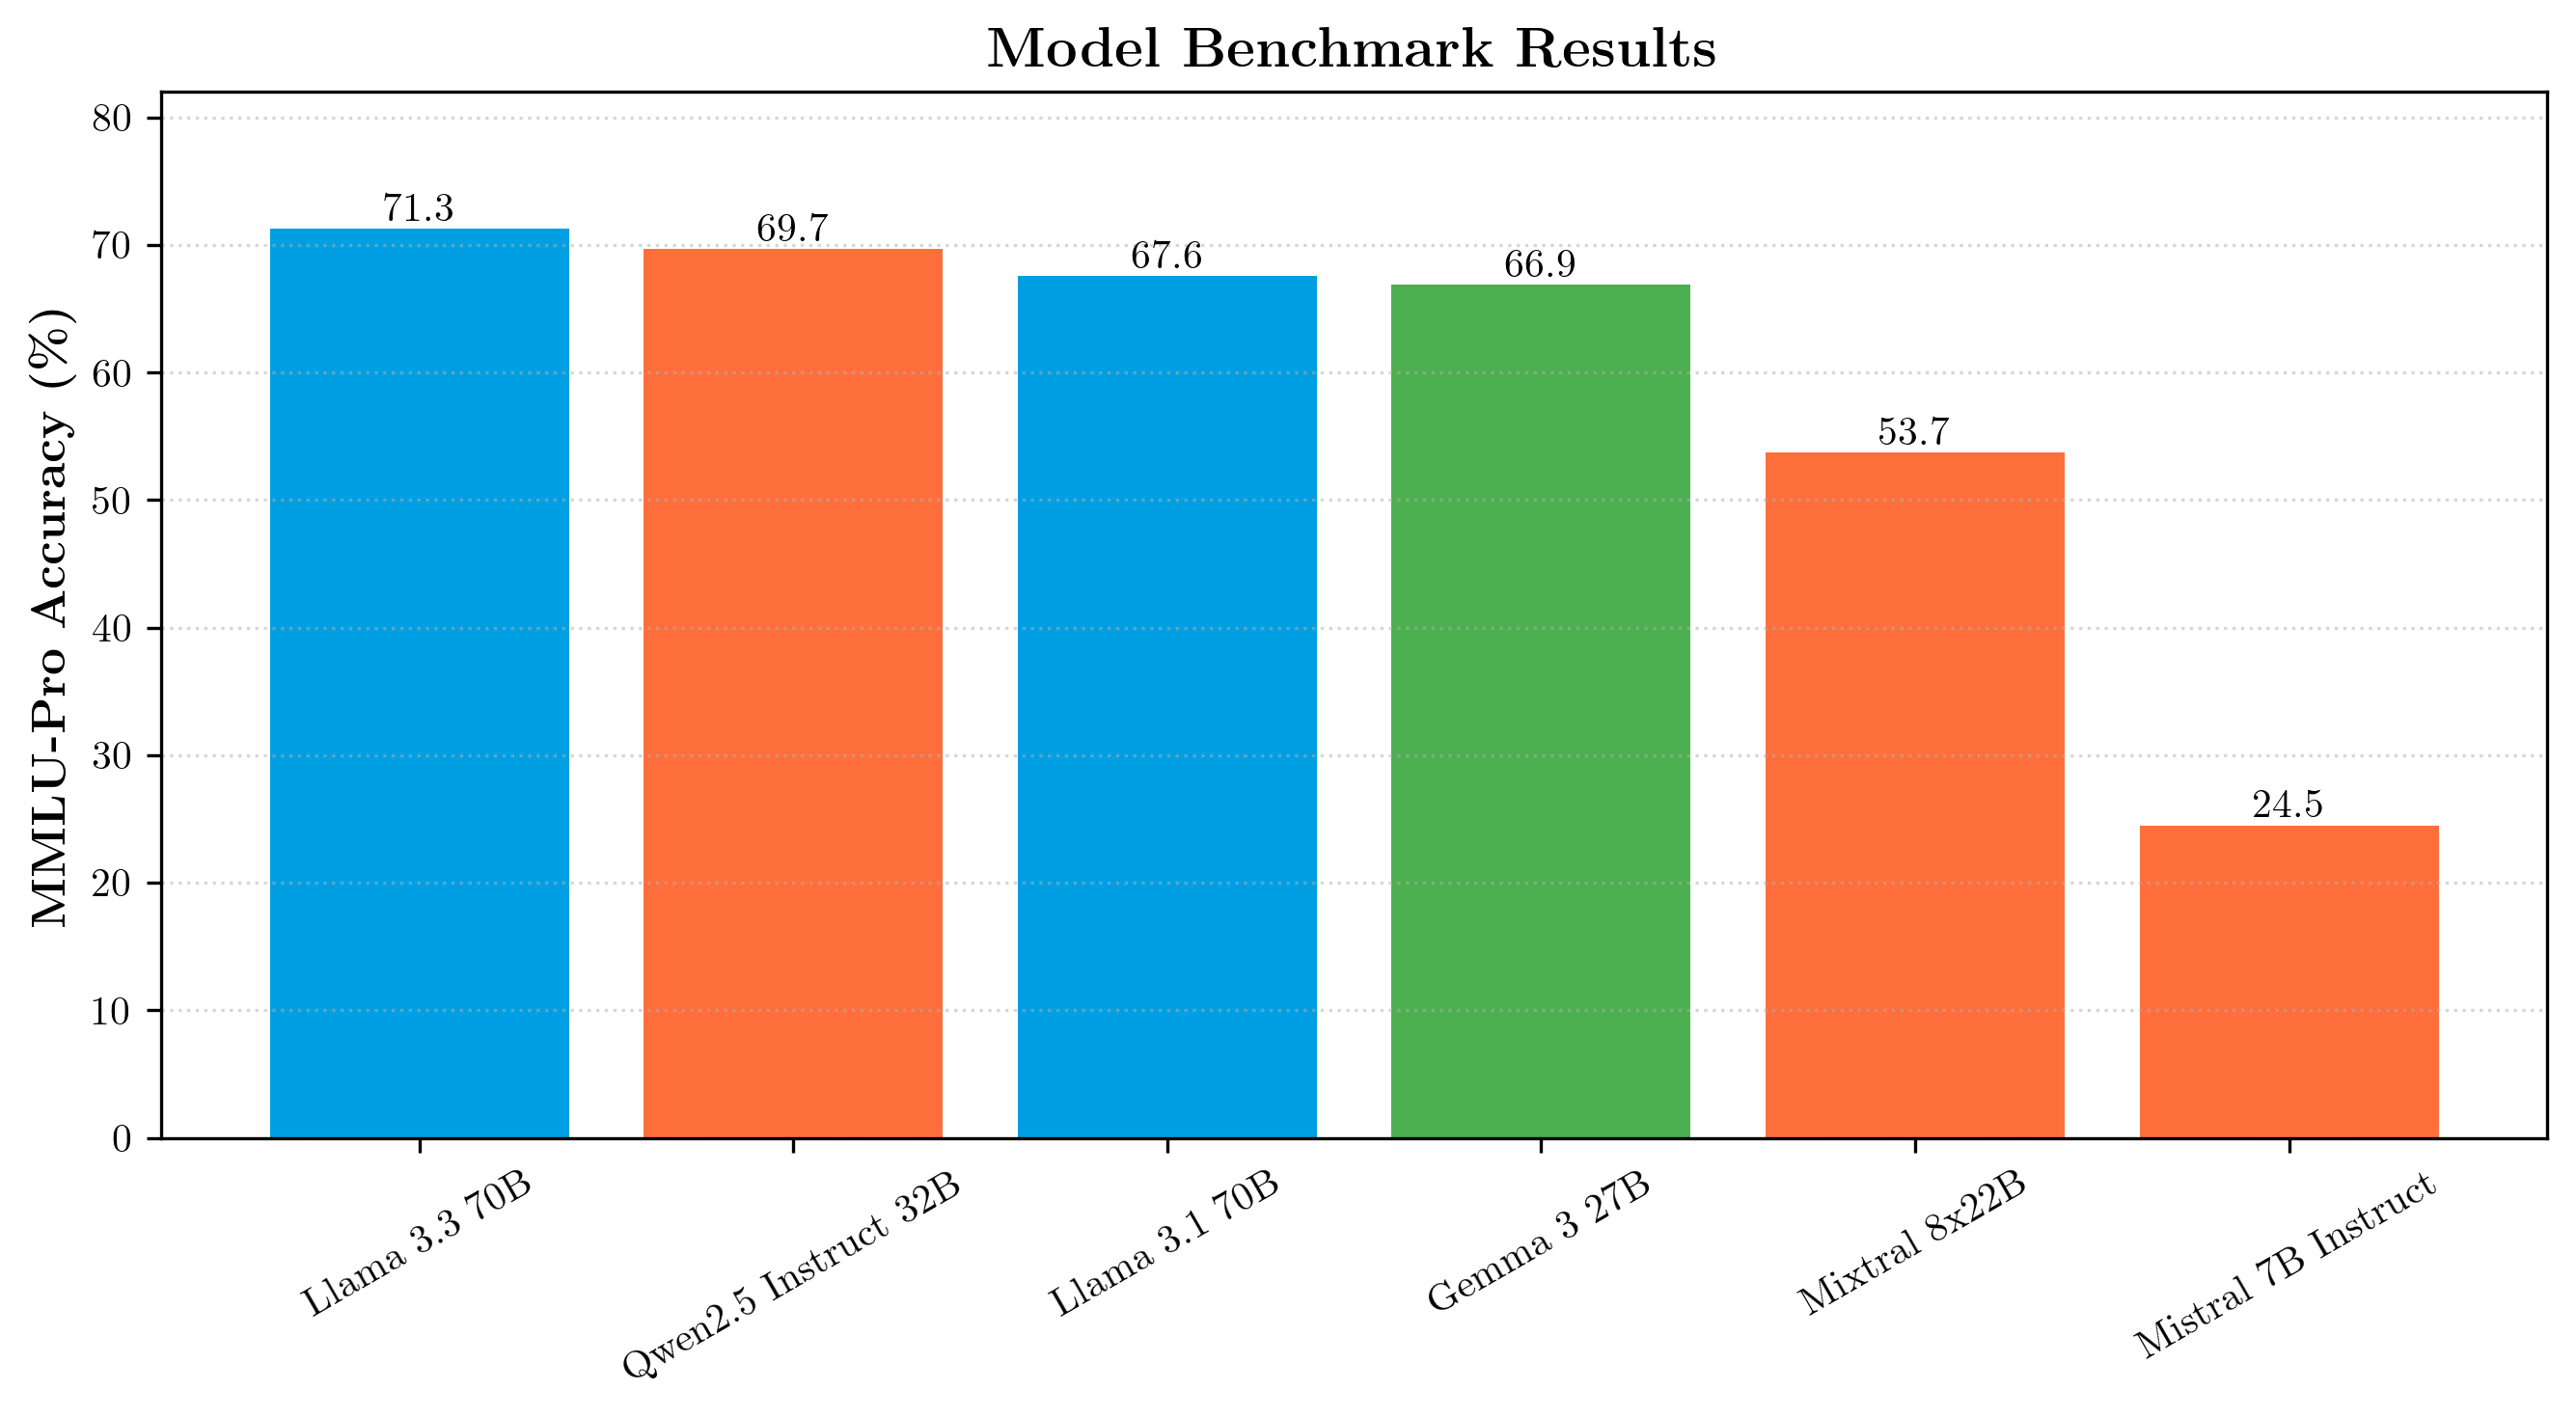

In [43]:
import matplotlib.pyplot as plt

models = ["Gemma 3 27B", "Llama 3.1 70B", "Llama 3.3 70B", 
          "Mixtral 8x22B", "Mistral 7B Instruct", "Qwen2.5 Instruct 32B"]
scores = [0.669, 0.676, 0.713, 0.537, 0.245, 0.697]

# Convert to percentages
scores_pct = [s * 100 for s in scores]

# Define colours by category
colors = []
for m in models:
    if "Llama" in m:
        colors.append("#009FE3")   # Meta Llama blue (darker)
    elif "Gemma" in m:
        colors.append("#4CAF50")   # Google Gemini green (darker)
    else:
        colors.append("#FF6F3C")   # Alibaba Qwen orange


# Sort models by score (descending)
sorted_items = sorted(zip(models, scores_pct, colors), key=lambda x: x[1], reverse=True)
models_sorted, scores_sorted, colors_sorted = zip(*sorted_items)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = 300   # high-resolution text/lines

fig, ax = plt.subplots(figsize=(9, 5), dpi=300)
bars = ax.bar(models_sorted, scores_sorted, color=colors_sorted)


# Annotate values above bars
for bar, val in zip(bars, scores_sorted):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{val:.1f}%",
        ha="center", va="bottom", fontsize=10
    )

# Axis labels and title
ax.set_ylabel(r"\textbf{MMLU-Pro Accuracy (\%)}", fontsize=12)
ax.set_title(r"\textbf{Model Benchmark Results}", fontsize=14)
ax.set_ylim(0, max(scores_sorted) * 1.15)
ax.tick_params(axis='x', labelrotation=30)

ax.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()
